In [14]:
from plumber import Stream, Pipe, PipeLine

artifact_path = "/home/nuttidalab/Documents/plab/plumber/artifacts"

In [17]:
class ExampleStream(Stream):
    def __init__(self, label: str) -> None:
        super().__init__(label)
        
        self.data[label] = "hi"

class ExamplePipe(Pipe):
    def __init__(self, label: str) -> None:
        super().__init__(label)

    def pipe(self, inputs):
        return str(inputs.keys())

input_stream = ExampleStream('input_stream')

pipe1 = ExamplePipe('pipe1')
pipe2 = ExamplePipe('pipe2')
pipe3 = ExamplePipe('pipe3')
pipe4 = ExamplePipe('pipe4')


PL = PipeLine()

PL.register(input_stream, pipe1)
PL.register(input_stream, pipe3)

PL.register(pipe1, pipe2)
PL.register(pipe3, pipe2)
PL.register(pipe2, pipe4)
PL.flow(input_stream)

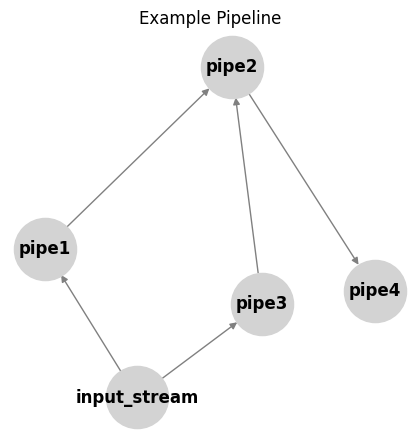

In [19]:
PL.plot(title="Example Pipeline")

In [4]:
from plumber.streams import IBLEidStream
from plumber.pipes import DaartInf, IBLMarkerExtractor, SimpleEnsembler

/home/nuttidalab/miniconda3/envs/iblenv/lib/python3.10/site-packages/one/params.py:184: UserWarning: Warning: the directory provided is already a cache for another URL.
  warnings.warn('Warning: the directory provided is already a cache for another URL.')


In [ ]:
# One stream
input_stream = IBLEidStream('eid_stream', 0)

# 3 pipes
extractor = IBLMarkerExtractor('markers', artifact_path, smooth=False)
smooth_extractor = IBLMarkerExtractor('smooth_markers', artifact_path, smooth=True)
predictor = DaartInf('daart_inf', artifact_path)
ensembler = SimpleEnsembler('simple_ensembler')


# 1 pipeline
PL = PipeLine()
PL.register(input_stream, extractor)
PL.register(input_stream, smooth_extractor)
PL.register(extractor, predictor)
PL.register(smooth_extractor, predictor)
PL.register(predictor, ensembler)

PL.flow(input_stream)

/home/nuttidalab/miniconda3/envs/iblenv/lib/python3.10/site-packages/torch/nn/utils/weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
/home/nuttidalab/Documents/plab/plumber/plumber/pipes/daart_inf.py:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We re

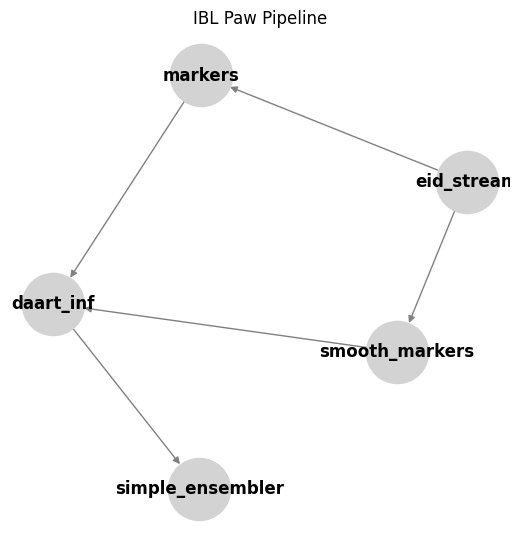

In [11]:
PL.plot(title="IBL Paw Pipeline", figsize=(5, 5), dpi=100)

In [1]:
from plumber.streams import IBLEidStream
from plumber.pipes import DaartInf, IBLMarkerExtractor, SimpleEnsembler

from plumber import Stream, Pipe, PipeLine

artifact_path = "/home/nuttidalab/Documents/plab/plumber/artifacts"

/home/nuttidalab/miniconda3/envs/iblenv/lib/python3.10/site-packages/one/params.py:184: UserWarning: Warning: the directory provided is already a cache for another URL.
  warnings.warn('Warning: the directory provided is already a cache for another URL.')


In [ ]:
# One stream
input_stream = IBLEidStream('eid_stream', 0)

# 3 pipes
extractor = IBLMarkerExtractor('markers', artifact_path, smooth=False)
predictor_1 = DaartInf('Mod1', artifact_path, "mod1")
predictor_2 = DaartInf('Mod2', artifact_path, "mod2")
predictor_3 = DaartInf('Mod3', artifact_path, "mod3")
predictor_4 = DaartInf('Mod4', artifact_path, "mod4")
predictor_5 = DaartInf('Mod5', artifact_path, "mod5")
ensembler = SimpleEnsembler('simple_ensembler')

# 1 pipeline
PL = PipeLine()
PL.register(input_stream, extractor)

PL.register(extractor, predictor_1)
PL.register(extractor, predictor_2)
PL.register(extractor, predictor_3)
PL.register(extractor, predictor_4)
PL.register(extractor, predictor_5)

PL.register(predictor_1, ensembler)
PL.register(predictor_2, ensembler)
PL.register(predictor_3, ensembler)
PL.register(predictor_4, ensembler)
PL.register(predictor_5, ensembler)

PL.flow(input_stream)

/home/nuttidalab/miniconda3/envs/iblenv/lib/python3.10/site-packages/torch/nn/utils/weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
/home/nuttidalab/Documents/plab/plumber/plumber/pipes/daart_inf.py:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We re

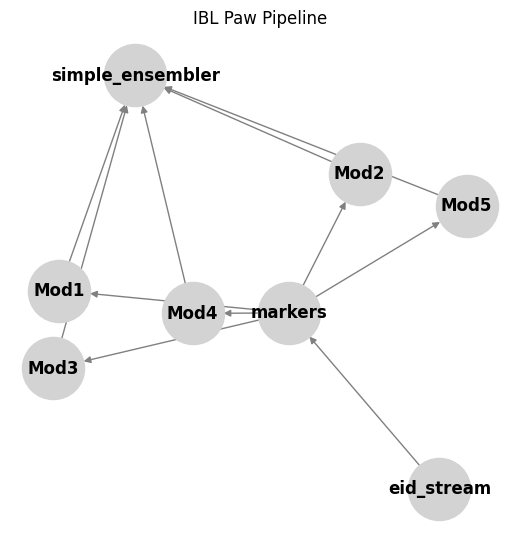

In [4]:
PL.plot(title="IBL Paw Pipeline", figsize=(5, 5), dpi=100)

In [63]:
import numpy as np

import matplotlib.pyplot as plt

from scipy import stats


In [64]:
data = input_stream.data
data.keys()

dict_keys(['eid_stream', 'markers', 'Mod1', 'Mod2', 'Mod3', 'Mod4', 'Mod5', 'simple_ensembler'])

In [65]:
o_predictions = np.array([data["Mod1"], data["Mod2"], data["Mod3"], data["Mod4"], data["Mod5"]])
o_predictions.shape

(5, 208000)

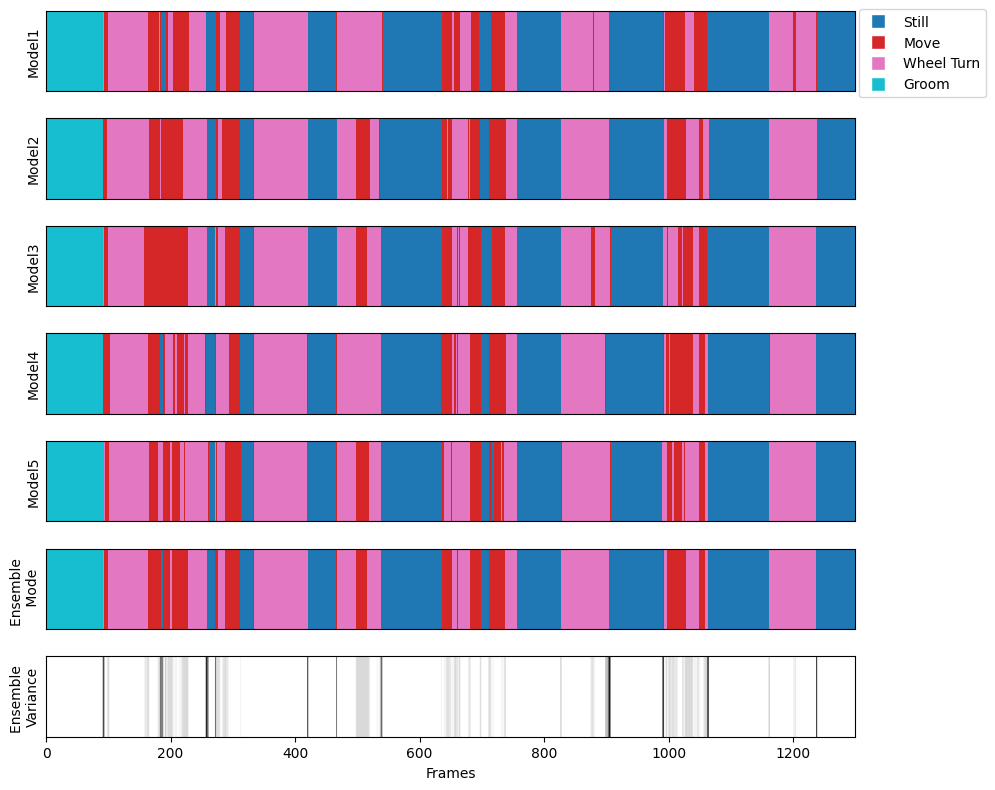

In [107]:
predictions = o_predictions[:,700:2000]

# Calculate the ensemble mode for each frame across the models
ensemble_mode = stats.mode(predictions, axis=0).mode.flatten()

# Calculate variance for each frame across the models
ensemble_variance = np.var(predictions, axis=0)


# Correct approach: using numerical values mapped to colors directly in the image plot
# Transforming predictions and ensemble mode to numerical color indices

# Map classes to numbers for image plot
color_map = {1: 0, 2: 1, 3: 2, 4: 3}
predictions_numeric = np.vectorize(color_map.get)(predictions)
ensemble_mode_numeric = np.vectorize(color_map.get)(ensemble_mode)

# Define a color palette for the 4 classes
cmap = plt.get_cmap('tab10', 4)

fig, axes = plt.subplots(7, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [1, 1, 1, 1, 1, 1, 1]})

# Plot each model's predictions as a continuous color block
for i in range(5):
    axes[i].imshow(predictions_numeric[i].reshape(1, -1), aspect='auto', cmap=cmap, vmin=0, vmax=3)
    # axes[i].axis('off')
    axes[i].set_ylabel(f"Model{i+1}")
    axes[i].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)  # Hide y-axis ticks for

# Plot the ensemble mode as a continuous color block
axes[5].imshow(ensemble_mode_numeric.reshape(1, -1), aspect='auto', cmap=cmap, vmin=0, vmax=3)
# axes[5].axis('off')
axes[5].set_ylabel("Ensemble \n Mode")
axes[5].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)  # Hide y-axis ticks for a clean look

# Plot the ensemble variance as a continuous grayscale block to match format
axes[6].imshow(ensemble_variance.reshape(1, -1), aspect='auto', cmap='Greys')
axes[6].set_ylabel("Ensemble \nVariance")
axes[6].set_xlabel("Frames")
axes[6].tick_params(left=False, labelleft=False)  # Hide y-axis ticks for a clean look

# Add the legend
legend_elements = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=cmap(0), label='Still', markersize=10),
                   plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=cmap(1), label='Move', markersize=10),
                   plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=cmap(2), label='Wheel Turn', markersize=10),
                   plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=cmap(3), label='Groom', markersize=10)]

axes[0].legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.17, 1.1))

plt.tight_layout()
plt.show()
